In [1]:
import sys

sys.path.append("../../src/stong_core_cython")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hartree_fock
import basis_data
import importlib
from scipy.constants import physical_constants
from scipy.optimize import minimize

importlib.reload(hartree_fock)
importlib.reload(basis_data)

from atom import *
from hartree_fock import *
from basis_data import *

In [3]:
df = pd.read_csv("../make_base/sto_3g.csv")

In [4]:
df_zetas = pd.read_csv("./zetas.csv")

In [5]:
def solve(zetas, atom_symbol):
    atoms = [Atom(atom_symbol, np.array([0.0, 0.0, 0.0]))]
    molecule = Molecule(atoms)
    basis_data = {atom_symbol: create_basis_data(df, zetas, 2, 1)}
    hartreefock = HartreeFock(molecule, basis_data, max_iter=10000, tol=1e-10)
    hartreefock.scf()
    hartreefock.calculate_total_energy()
    results = hartreefock.get_results()
    return results, hartreefock


def get_ionization_energy(df_zetas, atom_symbol, n_occ):
    results, _ = solve(df_zetas[atom_symbol], atom_symbol)
    energy_lebels = np.hstack((results["val_up"], results["val_dn"]))
    energy_lebels = np.sort(energy_lebels)
    return -energy_lebels[n_occ]

In [6]:
elements = ["H", "He", "Li", "Be", "B", "C", "N", "O", "F", "Ne"]
ionization_energies = {}
electron_affinities = {}
for i, element in enumerate(elements):
    print(element)
    ionization_energies[element] = get_ionization_energy(df_zetas, element, i)
    print(f"ionization_energies = {ionization_energies[element]} Hartree")

H
ionization_energies = 0.49664608896368445 Hartree
He
ionization_energies = 0.9094672347641495 Hartree
Li
ionization_energies = 0.19419479663480071 Hartree
Be
ionization_energies = 0.3043872739593306 Hartree
B
ionization_energies = 0.29800509417369847 Hartree
C
ionization_energies = 0.2984833659011431 Hartree
N
ionization_energies = 0.3377090338981877 Hartree
O
ionization_energies = 0.42176157112912027 Hartree
F
ionization_energies = 0.4488387646268662 Hartree
Ne
ionization_energies = 0.5345634412412514 Hartree


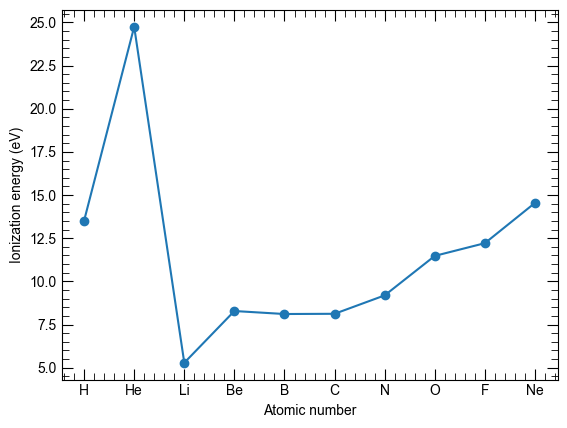

In [8]:
hartree_to_ev_factor = physical_constants["Hartree energy in eV"][0]
fig, ax = plt.subplots()
ax.plot(
    range(1, 11),
    hartree_to_ev_factor * np.array(list(ionization_energies.values())),
    marker="o",
)
ax.set_xticks(range(1, 11))
ax.set_xticklabels(elements)
ax.set_xlabel("Atomic number")
ax.set_ylabel("Ionization energy (eV)")
plt.show()